In [1]:
import warnings
warnings.filterwarnings('ignore')
from sklearn import datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
iris = datasets.load_iris()

In [7]:
# Let's convert to dataframe
iris = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['species'])

# let's remove spaces from column name
iris.columns = iris.columns.str.replace(' ','')

# replace the values with class labels
iris.species = np.where(iris.species == 0.0, 'setosa', np.where(iris.species==1.0,'versicolor', 'virginica'))

# data dimension 
print(iris.shape)

# Peek at the 1st few records
iris.head()

(150, 5)


,sepallength(cm),sepalwidth(cm),petallength(cm),petalwidth(cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


***Univariate Analysis***

Individual variables are analysied in isolation to get better understanding about them.

In [10]:
iris.describe()

,sepallength(cm),sepalwidth(cm),petallength(cm),petalwidth(cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [11]:
iris['species'].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

<Figure size 1500x800 with 0 Axes>

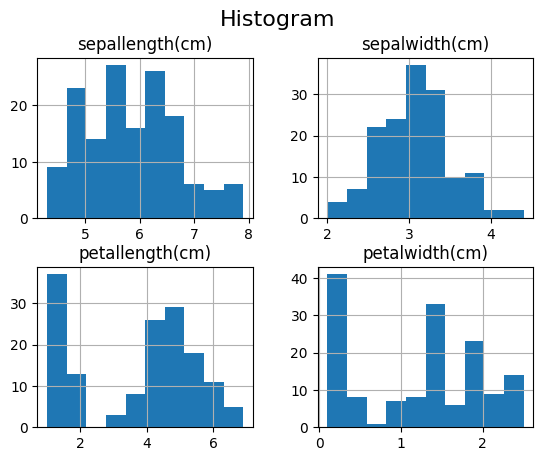

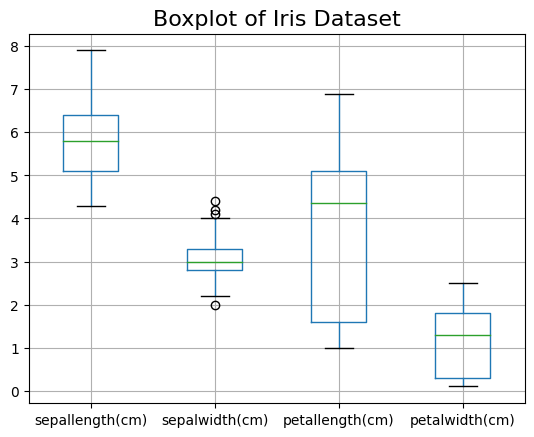

In [13]:
# Set the size of the plot
plt.figure(figsize=(15,8))

iris.hist()        # plot histogram
plt.suptitle("Histogram", fontsize=16) # use suptitle to add title to all sublots
plt.show()

iris.boxplot()     # plot boxplot  
plt.title("Boxplot of Iris Dataset", fontsize=16)
plt.show()

***Multivariate Analysis***

In multivariate analysis you try to estabilish a sense of relationship of all variables with one other.

array([[<Axes: title={'center': 'petallength(cm)'}, xlabel='[species]'>,
        <Axes: title={'center': 'petalwidth(cm)'}, xlabel='[species]'>],
       [<Axes: title={'center': 'sepallength(cm)'}, xlabel='[species]'>,
        <Axes: title={'center': 'sepalwidth(cm)'}, xlabel='[species]'>]],
      dtype=object)

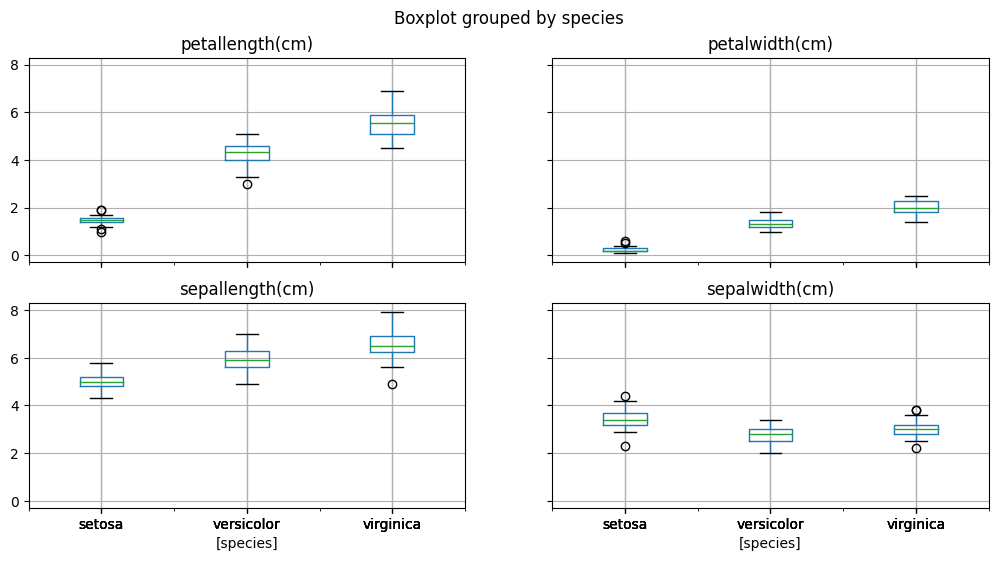

In [14]:
iris.boxplot(by="species", figsize=(12, 6))

In [15]:
iris.groupby(by = "species").mean()

,sepallength(cm),sepalwidth(cm),petallength(cm),petalwidth(cm)
species,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


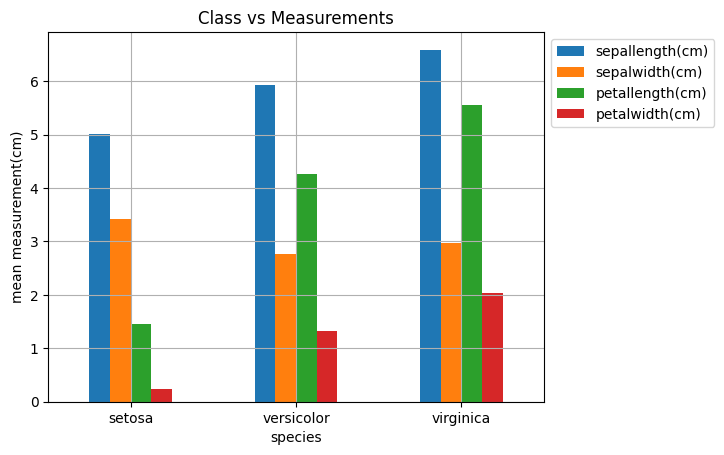

In [18]:
# plot for mean of each feature for each label class
iris.groupby(by = "species").mean().plot(kind="bar")

plt.title('Class vs Measurements')
plt.ylabel('mean measurement(cm)')
plt.xticks(rotation=0)  # manage the xticks rotation
plt.grid(True)

# Use bbox_to_anchor option to place the legend outside plot area to be tidy 
plt.legend(loc="upper left", bbox_to_anchor=(1,1))

***Correlation matrix***

Correlation function uses Pearson correlation coefficient which results in a number between -1 to 1. Strong negative relationship is indicated by a coefficient is toward -1 and a strong positive correlation is indicated by a coefficient towards 1.

In [20]:
# create correlation matrix
numeric_columns = iris.select_dtypes(include=['float64', 'int64'])
corr = numeric_columns.corr()
corr

,sepallength(cm),sepalwidth(cm),petallength(cm),petalwidth(cm)
sepallength(cm),1.000000,-0.117570,0.871754,0.817941
sepalwidth(cm),-0.117570,1.000000,-0.428440,-0.366126
petallength(cm),0.871754,-0.428440,1.000000,0.962865
petalwidth(cm),0.817941,-0.366126,0.962865,1.000000


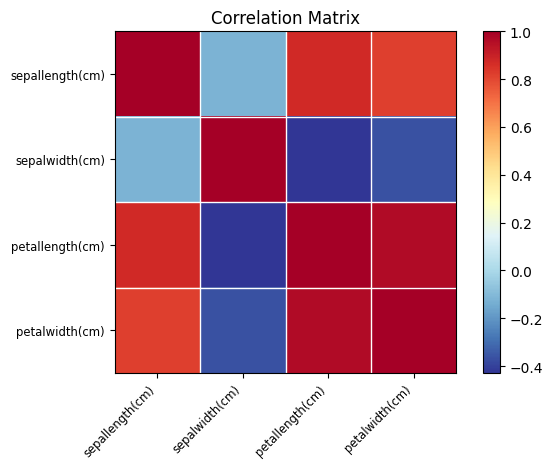

In [21]:
import statsmodels.api as sm
sm.graphics.plot_corr(corr, xnames=list(corr.columns))
plt.show()

***Pair plot***

You can understnad the relationship attributes by looking at the distribution of the interactions of each pair of attributes

This uses a built function to create a matrix of scatter plots of all attributes versus all attributes.

Text(0.5, 0.98, 'Pair Plot')

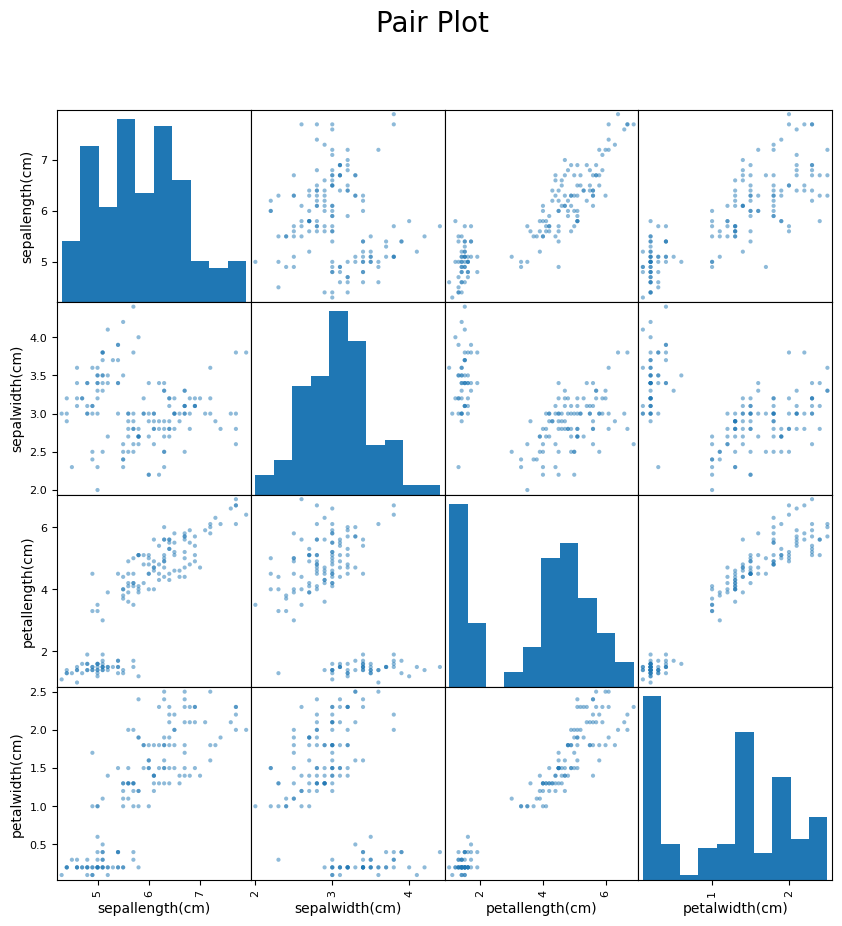

In [23]:
from pandas.plotting import scatter_matrix
scatter_matrix(iris, figsize=(10, 10))
plt.suptitle("Pair Plot", fontsize=20) # use suptitle to add title to all sublots